## Customer Subscription Churn and Usage Patterns:

Churn = when a customer stops using a product or service over a period of time.

This dataset contains synthetic subscription-based customer data designed to analyze customer churn behavior in digital services such as SaaS platforms, OTT subscriptions, or online learning systems. It captures customer usage patterns, payment behavior, engagement metrics, and support interactions.

The dataset is structured to support moderate-level machine learning tasks, particularly churn prediction, making it suitable for classification models, feature importance analysis, and business-driven EDA.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('cust.csv')

In [5]:
df.head()

,user_id,signup_date,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago,churn
0,1,2023-04-15,Premium,699,1.1,4,1,8,14,Yes
1,2,2023-08-27,Premium,699,2.6,6,0,35,1,Yes
2,3,2023-10-12,Premium,699,14.3,8,3,2,14,Yes
3,4,2023-12-11,Basic,199,17.6,5,2,11,9,Yes
4,5,2023-02-14,Basic,199,9.8,5,2,6,38,Yes


In [6]:
df.columns

Index(['user_id', 'signup_date', 'plan_type', 'monthly_fee',
       'avg_weekly_usage_hours', 'support_tickets', 'payment_failures',
       'tenure_months', 'last_login_days_ago', 'churn'],
      dtype='object')

In [7]:
df.isnull().sum()

user_id                   0
signup_date               0
plan_type                 0
monthly_fee               0
avg_weekly_usage_hours    0
support_tickets           0
payment_failures          0
tenure_months             0
last_login_days_ago       0
churn                     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 2800 non-null   int64  
 1   signup_date             2800 non-null   object 
 2   plan_type               2800 non-null   object 
 3   monthly_fee             2800 non-null   int64  
 4   avg_weekly_usage_hours  2800 non-null   float64
 5   support_tickets         2800 non-null   int64  
 6   payment_failures        2800 non-null   int64  
 7   tenure_months           2800 non-null   int64  
 8   last_login_days_ago     2800 non-null   int64  
 9   churn                   2800 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 218.9+ KB


In [9]:
df.describe()

,user_id,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1400.500000,434.214286,12.891429,3.887857,2.491786,18.612857,30.005000
std,808.434702,205.678472,7.109691,2.606419,1.691647,10.374487,17.852757
min,1.000000,199.000000,0.500000,0.000000,0.000000,1.000000,0.000000
25%,700.750000,199.000000,6.700000,2.000000,1.000000,10.000000,14.000000
50%,1400.500000,399.000000,12.800000,4.000000,2.000000,18.000000,30.000000
75%,2100.250000,699.000000,19.200000,6.000000,4.000000,27.000000,46.000000
max,2800.000000,699.000000,25.000000,8.000000,5.000000,36.000000,60.000000


In [10]:
df.columns = df.columns.str.strip()

In [11]:
df=df.drop(['user_id','signup_date'],axis=1)

In [12]:
df.head()

,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago,churn
0,Premium,699,1.1,4,1,8,14,Yes
1,Premium,699,2.6,6,0,35,1,Yes
2,Premium,699,14.3,8,3,2,14,Yes
3,Basic,199,17.6,5,2,11,9,Yes
4,Basic,199,9.8,5,2,6,38,Yes


In [13]:
df['churn'] = np.where(df['churn'].str.contains('Yes'), 1, 0)

In [14]:
df.tail()

,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago,churn
2795,Standard,399,6.7,1,1,21,59,0
2796,Standard,399,11.0,4,0,6,4,0
2797,Standard,399,11.0,0,4,22,59,0
2798,Premium,699,15.0,3,4,25,20,0
2799,Standard,399,2.0,0,1,12,1,1


In [15]:
df['plan_type'] = df['plan_type'].map({
    'Basic': 0,
    'Standard': 1,
    'Premium': 2
})
df.head()

,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago,churn
0,2,699,1.1,4,1,8,14,1
1,2,699,2.6,6,0,35,1,1
2,2,699,14.3,8,3,2,14,1
3,0,199,17.6,5,2,11,9,1
4,0,199,9.8,5,2,6,38,1


In [16]:
X=df.drop(['churn'],axis=1)
Y=df['churn']

In [17]:
X.head()

,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago
0,2,699,1.1,4,1,8,14
1,2,699,2.6,6,0,35,1
2,2,699,14.3,8,3,2,14
3,0,199,17.6,5,2,11,9
4,0,199,9.8,5,2,6,38


In [18]:
df.corr()

,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago,churn
plan_type,1.000000,0.993411,-0.030410,0.016844,-0.016894,0.015481,-0.003188,0.001735
monthly_fee,0.993411,1.000000,-0.030243,0.015366,-0.017959,0.014545,-0.003025,0.003796
avg_weekly_usage_hours,-0.030410,-0.030243,1.000000,0.030636,0.013552,-0.010306,-0.002434,-0.103788
support_tickets,0.016844,0.015366,0.030636,1.000000,-0.007259,-0.044547,-0.058878,0.149623
payment_failures,-0.016894,-0.017959,0.013552,-0.007259,1.000000,0.022843,0.021437,0.213752
tenure_months,0.015481,0.014545,-0.010306,-0.044547,0.022843,1.000000,0.017535,0.002044
last_login_days_ago,-0.003188,-0.003025,-0.002434,-0.058878,0.021437,0.017535,1.000000,0.186366
churn,0.001735,0.003796,-0.103788,0.149623,0.213752,0.002044,0.186366,1.000000


<Axes: >

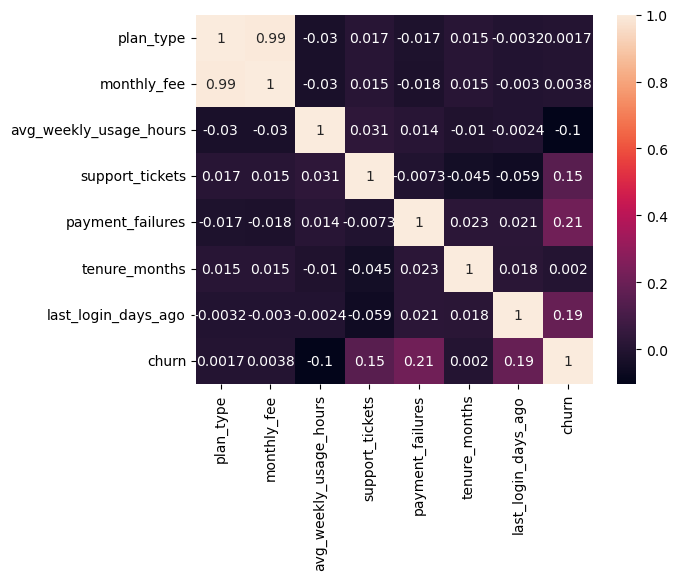

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   plan_type               2800 non-null   int64  
 1   monthly_fee             2800 non-null   int64  
 2   avg_weekly_usage_hours  2800 non-null   float64
 3   support_tickets         2800 non-null   int64  
 4   payment_failures        2800 non-null   int64  
 5   tenure_months           2800 non-null   int64  
 6   last_login_days_ago     2800 non-null   int64  
 7   churn                   2800 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 175.1 KB


In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [23]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((2100, 7), (700, 7), (2100,), (700,))

In [24]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

In [25]:
X_train.corr()

,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago
plan_type,1.000000,0.993356,-0.021533,0.023872,-0.020778,0.036322,-0.018974
monthly_fee,0.993356,1.000000,-0.021704,0.024109,-0.023473,0.034474,-0.019097
avg_weekly_usage_hours,-0.021533,-0.021704,1.000000,0.032320,0.005457,-0.023582,-0.005792
support_tickets,0.023872,0.024109,0.032320,1.000000,-0.004100,-0.039245,-0.073719
payment_failures,-0.020778,-0.023473,0.005457,-0.004100,1.000000,0.015345,0.028657
tenure_months,0.036322,0.034474,-0.023582,-0.039245,0.015345,1.000000,0.007135
last_login_days_ago,-0.018974,-0.019097,-0.005792,-0.073719,0.028657,0.007135,1.000000


<Axes: >

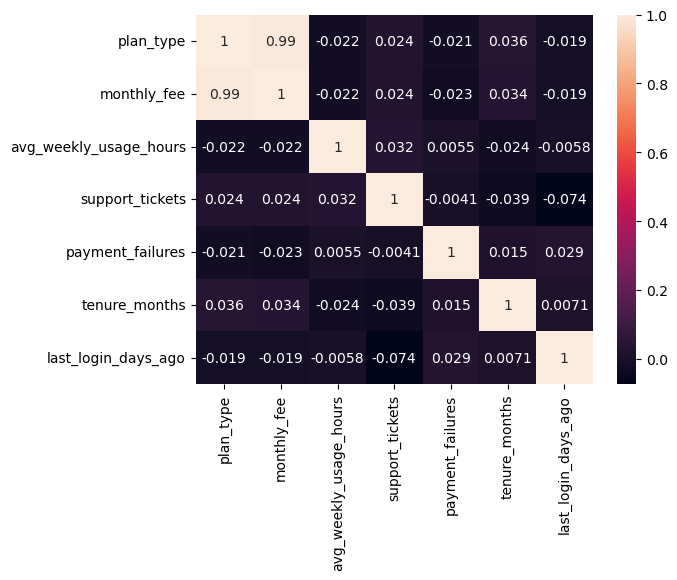

In [26]:
sns.heatmap(X_train.corr(),annot=True)

In [27]:
corr_feature=correlation(X_train,0.85)
print(corr_feature)

{'monthly_fee'}


In [28]:
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)
X_train.shape,X_test.shape

((2100, 6), (700, 6))

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [30]:
regression.fit(X_train_scale,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [31]:
regression.coef_

array([ 0.00268104, -0.05540726,  0.08360362,  0.10594141, -0.00013218,
        0.0961761 ])

In [32]:
regression.intercept_

np.float64(0.5704761904761905)

##  Linear,Ridge,Lasso,Elasticnet

Mean square error: 0.21733848152739355
Mean absolute error: 0.4343364553310606
Root Mean square error: 0.4661957545145532
R2:0.10696047875134929


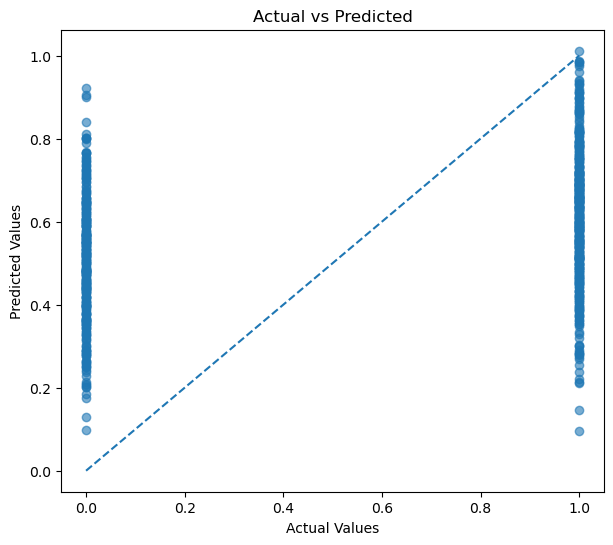

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
Y_pred=regression.predict(X_test_scale)
score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(f"Mean square error: {mse}")
print(f"Mean absolute error: {mae}")
print(f"Root Mean square error: {rmse}")
print(f"R2:{score}")
plt.figure(figsize=(7,6))

plt.scatter(Y_test, Y_pred, alpha=0.6)

# perfect prediction line
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

plt.show()

Mean square error: 0.24348934240362813
Mean absolute error: 0.48852244897959185
Root Mean square error: 0.49344639263412204
R2:-0.000492891277874552


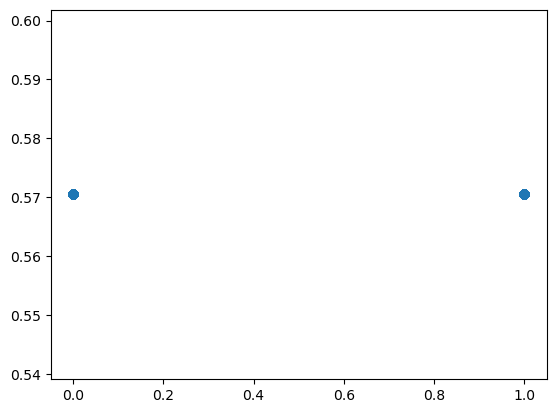

In [44]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scale,Y_train)
Y_pred=lasso.predict(X_test_scale)
score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(f"Mean square error: {mse}")
print(f"Mean absolute error: {mae}")
print(f"Root Mean square error: {rmse}")
print(f"R2:{score}")
plt.scatter(Y_test,Y_pred)

Mean square error: 0.21733734809877198
Mean absolute error: 0.4343625140533143
Root Mean square error: 0.466194538898486
R2:0.10696513598713397


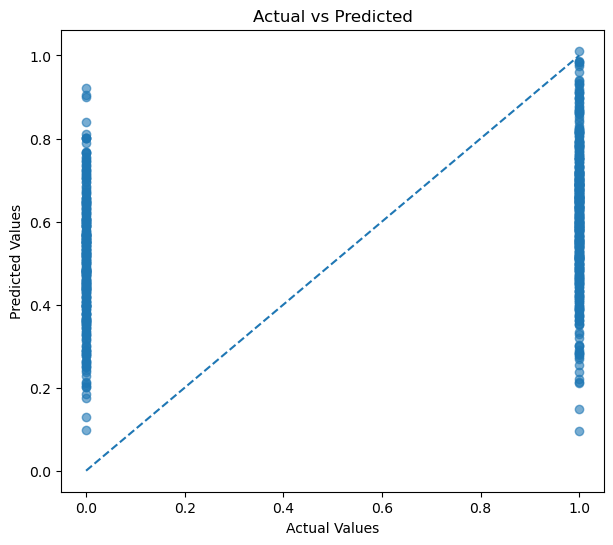

In [51]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scale,Y_train)
Y_pred=ridge.predict(X_test_scale)
score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(f"Mean square error: {mse}")
print(f"Mean absolute error: {mae}")
print(f"Root Mean square error: {rmse}")
print(f"R2:{score}")
plt.figure(figsize=(7,6))

plt.scatter(Y_test, Y_pred, alpha=0.6)

# perfect prediction line
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

plt.show()

Mean square error: 0.24348934240362813
Mean absolute error: 0.48852244897959185
Root Mean square error: 0.49344639263412204
R2:-0.000492891277874552


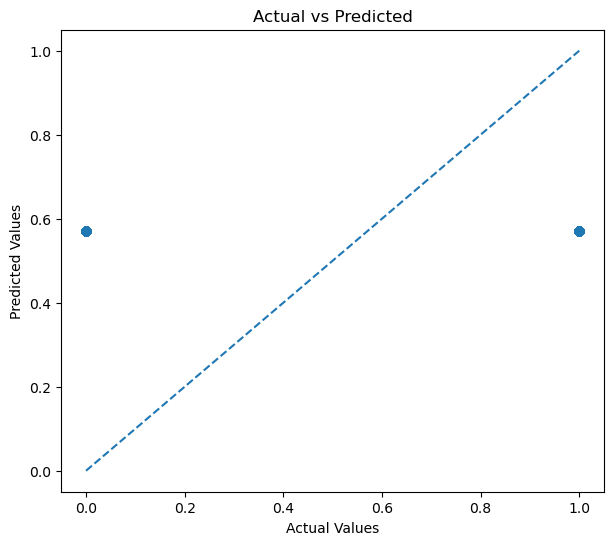

In [50]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_scale,Y_train)
Y_pred=lasso.predict(X_test_scale)
score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(f"Mean square error: {mse}")
print(f"Mean absolute error: {mae}")
print(f"Root Mean square error: {rmse}")
print(f"R2:{score}")
plt.figure(figsize=(7,6))

plt.scatter(Y_test, Y_pred, alpha=0.6)

# perfect prediction line
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

plt.show()

## Cross Validation

Mean absolute error 0.4345958907199779
R2 Score 0.10700431016509149


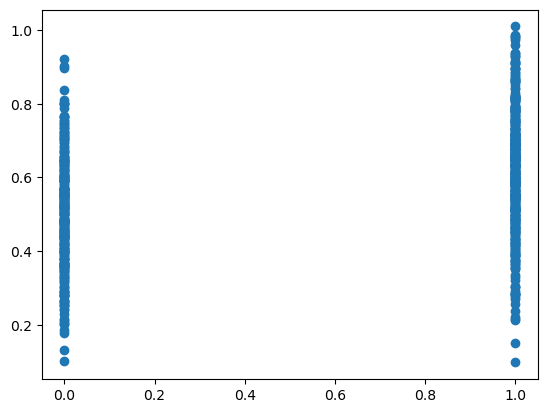

In [39]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scale,Y_train)
y_pred=ridgecv.predict(X_test_scale)
plt.scatter(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.43610195651990136
R2 Score 0.10734517483587658


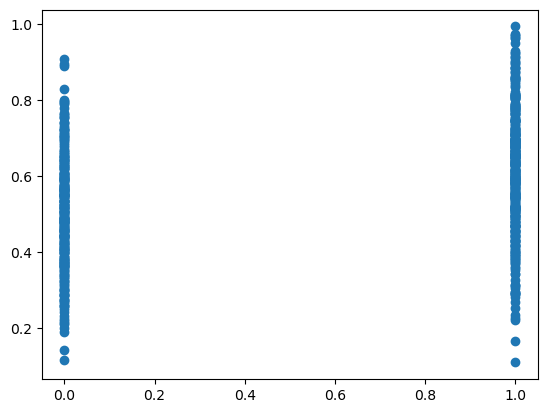

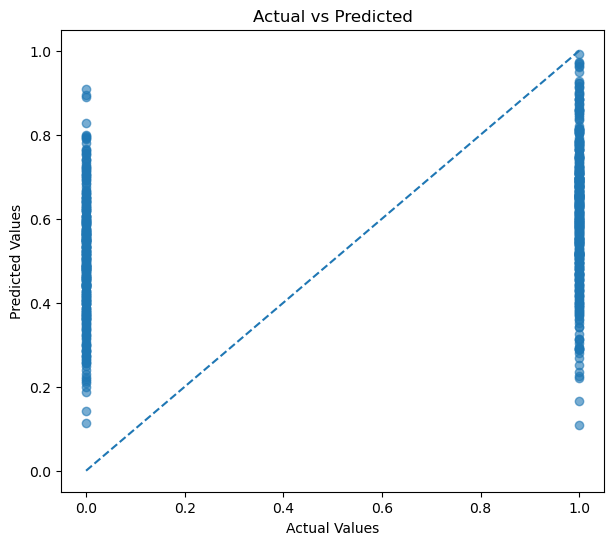

In [52]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scale,Y_train)
y_pred=lassocv.predict(X_test_scale)
plt.scatter(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.figure(figsize=(7,6))

plt.scatter(Y_test, y_pred, alpha=0.6)

# perfect prediction line
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

plt.show()

Mean absolute error 0.43610195651990136
R2 Score 0.10734517483587658


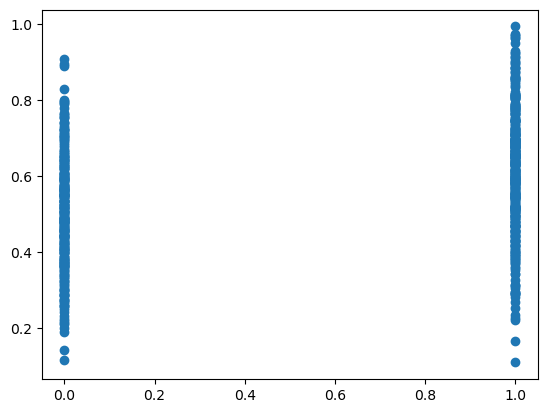

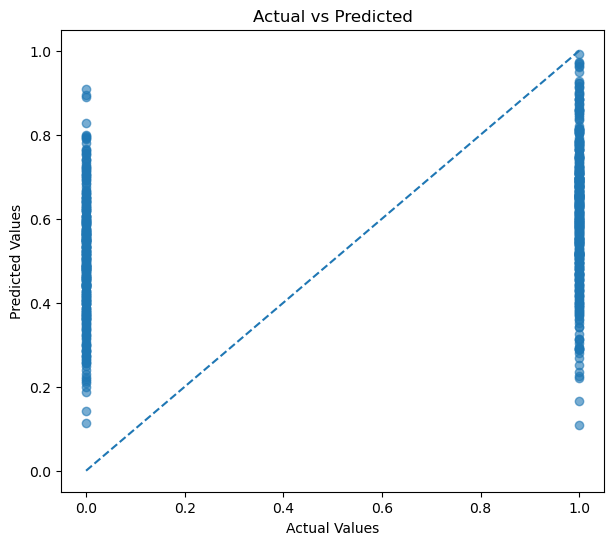

In [53]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scale,Y_train)
y_pred=lassocv.predict(X_test_scale)
plt.scatter(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.figure(figsize=(7,6))

plt.scatter(Y_test, y_pred, alpha=0.6)

# perfect prediction line
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

plt.show()

In [47]:
ridge.predict(X_test)

e:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


array([ 6.13370851,  3.74522771,  1.02733505,  4.80030657,  2.63833147,
        3.27860614,  4.41115051,  3.2143438 ,  3.40040643,  3.49434435,
        1.13189792,  1.28167273,  4.23822943,  3.43330748,  0.6191893 ,
        0.639868  ,  5.98891767,  1.67695434,  1.09315698,  3.34661175,
        0.2634131 ,  2.23649992,  6.03035229,  1.45736969,  0.93366858,
        1.82273956,  5.36338127,  5.05279162,  0.6225541 ,  5.04824638,
        1.81522092,  3.84311753,  4.82290548,  4.07071092,  4.0266222 ,
        3.25277502,  5.23320979,  1.36766524,  3.63886264,  1.32139018,
        5.74518872,  3.05996131,  3.95648585,  2.59342806,  4.47434244,
        4.39433993,  5.46106033,  3.76219026,  5.70751658,  0.79962207,
        1.02907561,  4.55691894,  0.48010952,  5.61536948,  4.59346484,
        0.71709245,  0.51069862,  5.41137683,  0.97580195,  2.7196148 ,
        1.53904649,  2.53638187,  2.48374588,  1.32889439,  5.1845577 ,
        4.26037399,  4.87480837,  3.43208776,  3.82985462,  2.21

In [55]:
import pickle
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scale, Y_train)
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))


In [57]:
X_train.columns

Index(['plan_type', 'avg_weekly_usage_hours', 'support_tickets',
       'payment_failures', 'tenure_months', 'last_login_days_ago'],
      dtype='object')

In [58]:
prediction = ridge.predict([[1, 12, 2, 0, 10, 3]])
print(prediction)

[0.3627856]
